# Part Two

## DOMAIN: Manufacturing

## CONTEXT: 

Company X curates and packages wine across various vineyards spread throughout the country.

## DATA DESCRIPTION: 
The data concerns the chemical composition of the wine and its respective quality.

Attribute Information: 

1. A, B, C, D: specific chemical composition measure of the wine

2. Quality: quality of wine [ Low and High ]

## PROJECT OBJECTIVE: 

Goal is to build a synthetic data generation model using the existing data provided by the company.

### Steps and tasks: 

1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [2]:
wine_data=pd.read_excel("Part2 - Company.xlsx")
wine_data

,A,B,C,D,Quality
0,72,32,10,2,Quality A
1,152,175,194,142,Quality B
2,146,162,179,144,NaN
3,107,86,25,79,Quality A
4,66,80,41,10,Quality A
...,...,...,...,...,...
56,136,191,138,170,Quality B
57,131,151,141,152,NaN
58,2,7,27,8,NaN
59,189,136,175,162,NaN


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [4]:
wine_data.describe(include='all')

,A,B,C,D,Quality
count,61.000000,61.000000,61.000000,61.000000,43
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Quality A
freq,NaN,NaN,NaN,NaN,26
mean,112.475410,118.508197,112.573770,113.295082,NaN
std,59.766659,58.130779,59.750163,63.348861,NaN
min,2.000000,3.000000,10.000000,2.000000,NaN
25%,54.000000,79.000000,49.000000,56.000000,NaN
50%,133.000000,132.000000,132.000000,133.000000,NaN
75%,159.000000,167.000000,164.000000,167.000000,NaN


In [5]:
wine_data.Quality.value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

### Lets convert the Quality attribute to numerical value. 0 for Quality A and 1 for Quality B

In [6]:
replace_struct = {"Quality":     {"Quality A": 0, "Quality B": 1}}
wine_data = wine_data.replace(replace_struct)

In [7]:
wine_data.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [8]:
X = wine_data.drop("Quality", axis = 1)
y = wine_data[['Quality']]
print(X)
y

      A    B    C    D
0    72   32   10    2
1   152  175  194  142
2   146  162  179  144
3   107   86   25   79
4    66   80   41   10
..  ...  ...  ...  ...
56  136  191  138  170
57  131  151  141  152
58    2    7   27    8
59  189  136  175  162
60  178  185  130  198

[61 rows x 4 columns]


,Quality
0,0.0
1,1.0
2,NaN
3,0.0
4,0.0
...,...
56,1.0
57,NaN
58,NaN
59,NaN


### Here, we are applying K means clustering with number of clusters as 2 because of the two different qualities of wine.

In [9]:
model=KMeans(2)
model.fit(X)
prediction=model.predict(X)

#Append the prediction 
wine_data["pred"] = prediction
wine_data

C:\Users\ac253\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,A,B,C,D,Quality,pred
0,72,32,10,2,0.0,0
1,152,175,194,142,1.0,1
2,146,162,179,144,NaN,1
3,107,86,25,79,0.0,0
4,66,80,41,10,0.0,0
...,...,...,...,...,...,...
56,136,191,138,170,1.0,1
57,131,151,141,152,NaN,1
58,2,7,27,8,NaN,0
59,189,136,175,162,NaN,1


In [10]:
known_quality = wine_data[wine_data.Quality.notnull()]
unknown_quality = wine_data[wine_data.Quality.isnull()]
print(known_quality)
print(unknown_quality)

      A    B    C    D  Quality  pred
0    72   32   10    2      0.0     0
1   152  175  194  142      1.0     1
3   107   86   25   79      0.0     0
4    66   80   41   10      0.0     0
6    52    9  110   28      0.0     0
8   168  132  146  147      1.0     1
10    9   71   15   22      0.0     0
11  173  151  199  199      1.0     1
12   53   48   38   24      0.0     0
13   31   96   22   34      0.0     0
15  159  162  197  133      1.0     1
16   78   49   88   77      0.0     0
17  104   17   86   44      0.0     0
19  134  167  168  187      1.0     1
20  151  186  148  156      1.0     1
21   73  104   86   85      0.0     0
22   89   39  108   50      0.0     0
24   54   99  102   61      0.0     0
25   53   33   21   19      0.0     0
26  183  176  154  160      1.0     1
28    4   39   37   42      0.0     0
30  182  176  164  193      1.0     1
31  188  134  179  197      1.0     1
33  199  177  188  200      1.0     1
34  166  180  175  186      1.0     1
36  177  164

In [11]:
from sklearn import metrics

#confusion matirx of known data
print(metrics.confusion_matrix(y_true=known_quality.Quality, y_pred=known_quality.pred))

# accuracy of known data
print("accuracy", metrics.accuracy_score(known_quality.Quality,known_quality.pred))

[[26  0]
 [ 0 17]]
accuracy 1.0


### We have got 100% accuracy from k means clustering on our wine data. Thus, we can predict the quality of the wine wherever empty the company has missed recording the data.

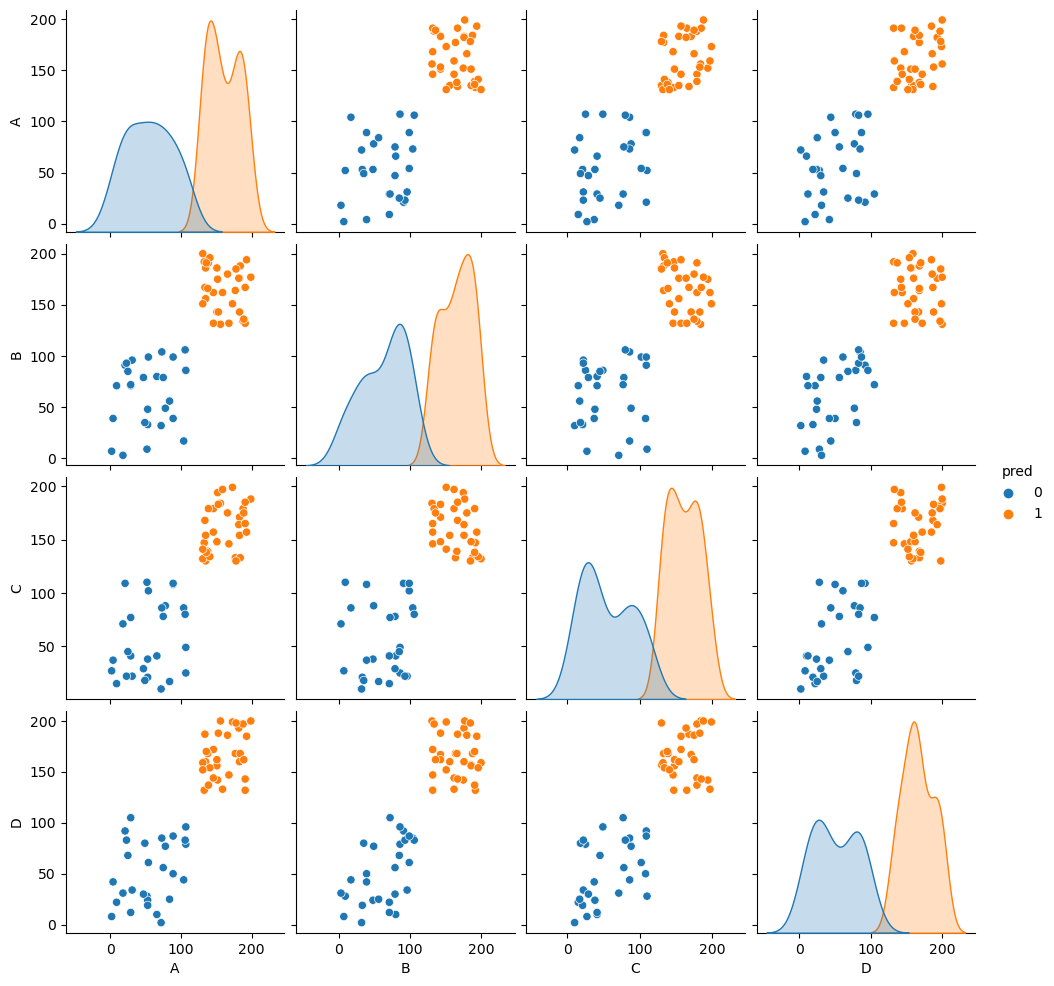

In [12]:
final_wine_data= wine_data.drop('Quality',axis=1)
sns.pairplot(final_wine_data, hue='pred')

### In the above pair plot we have demostrated the different clusters in the data.